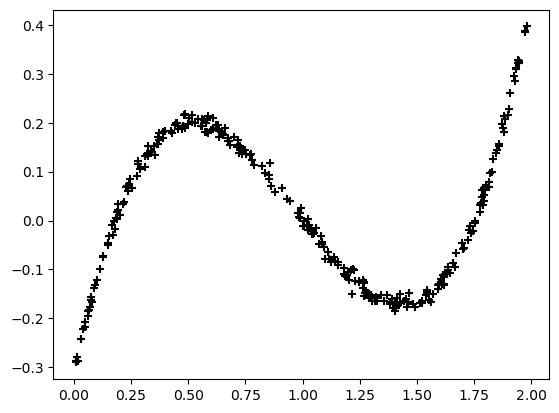

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#数据准备
np.random.seed(42)
x=2*np.random.rand(300,1)
y=x*x*x-2.93*x*x+2.245*x-0.315+np.random.randn(300,1)*0.01
plt.scatter(x,y,marker='+',color='black')

In [ ]:
#数据处理
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

x=torch.from_numpy(x).float()
y=torch.from_numpy(y).float()
dataset=TensorDataset(x,y)

dataloader=DataLoader(dataset,batch_size=16,shuffle=True)



In [ ]:
print('Len of DataLoader',len(dataloader))
for index,(data,lable) in enumerate(dataloader):
    print(f' index={index},num={len(data):2}')

Len of DataLoader 19
 index=0,num=16
 index=1,num=16
 index=2,num=16
 index=3,num=16
 index=4,num=16
 index=5,num=16
 index=6,num=16
 index=7,num=16
 index=8,num=16
 index=9,num=16
 index=10,num=16
 index=11,num=16
 index=12,num=16
 index=13,num=16
 index=14,num=16
 index=15,num=16
 index=16,num=16
 index=17,num=16
 index=18,num=12


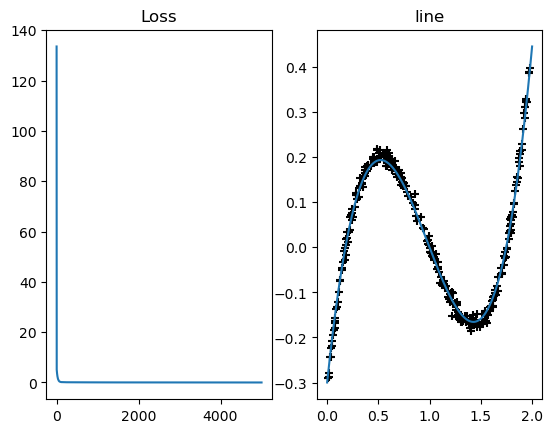

In [ ]:
epoch=5000
lr=0.01
w1=torch.randn(1,requires_grad=True)
w2=torch.randn(1,requires_grad=True)
w3=torch.randn(1,requires_grad=True)
b=torch.randn(1,requires_grad=True)
Loss=[]
for epoch in range(1,epoch+1):
    sum_loss=0
    for batch_id,(bx,by) in enumerate(dataloader):
        h=w1*bx*bx*bx+w2*bx*bx+w3*bx+b
        loss=torch.mean((h-by)**2)
        sum_loss+=loss.item()
        loss.backward()
        w1.data-=lr*w1.grad.data
        w2.data-=lr*w2.grad.data
        w3.data-=lr*w3.grad.data
        b.data-=lr*b.grad.data
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        b.grad.zero_()
    Loss.append(sum_loss)
Loss_x=[i for i in range(1,epoch+1)]
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(Loss_x,Loss)
w_1=w1.item()
w_2=w2.item()
w_3=w3.item()
b_1=b.item()
xx=np.linspace(0,2,300)
h=w_1*xx*xx*xx+w_2*xx*xx+w_3*xx+b_1
plt.subplot(1,2,2)
plt.title('line')
plt.plot(xx,h)
plt.scatter(x,y,marker='+',color='black')
plt.show()
